# Fit two parabolas to the apparent two populations of FRBs using a least squares algorithm (scipy.optimize.leastsq)

In [1]:
%pylab inline
import numpy as np
from scipy.optimize import minimize

Populating the interactive namespace from numpy and matplotlib


In [2]:
#W     pulse width in ms
# DM    dispersion measure in cm-3 pc
# Speak peak flux density in units of Jy
# f     frequency at which Speak is measured in GHz
# RA    J2000 right ascension hh:mm
# DEC   J2000 declination dd:mm
# UTC   Universal Coordinated Time at which burst arrived on yy mm dd
# Telescope - the telescope which observed the FRB
# Year - the year in which the burst was discovered (not necessarily = yy!)
# refs - bibliographic ta
#W, DM, Speak,f,RA,DEC,UTC,Tele,Year,refs = np.loadtxt('FRBs.txt', unpack = True)
#f = open('FRBs.txt', 'r')
name, W, DM = np.loadtxt("FRBs.txt", comments="#", unpack=True, usecols = [0,1,2])
#print name,W,DM

In [92]:
def fwhere(W):
    return -(1400./8.)*W +1400

def fwhere1(W):
    return -(1400./12.)*W +1400

1.45426582539
187.30829919


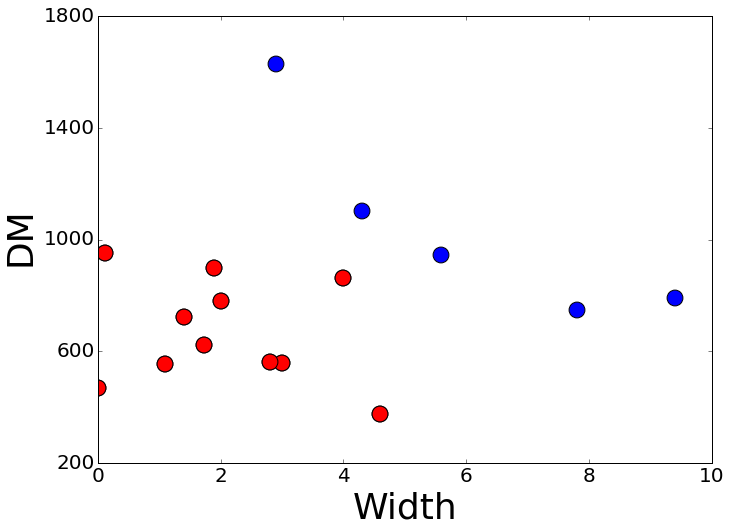

In [98]:
#Manually clustering and finding standard deviations
whwidth = np.where(W<=5)
wtemp = W[whwidth]
dmtemp = DM[whwidth]
whdm = np.where(dmtemp<=1000)
w_clust1 = wtemp[whdm]
dm_clust1 = dmtemp[whdm]
plt.figure(figsize=(11,8))
plt.scatter(W,DM,s=250, c='b',edgecolors='black' )
plt.scatter(w_clust1,dm_clust1,s=250, c='r',edgecolors='black')
plt.xlabel('Width',fontsize=36 )
plt.ylabel('DM', fontsize=36)## what about that 3.7??
plt.xlim(0.0, 10)
plt.xticks(fontsize = 20)
plt.yticks(np.linspace(200, 1800, 5), fontsize = 20)
#plt.savefig('two_pop.pdf')
#plt.show()
#plt.plot(W, fwhere(W))
whwidth2 = np.where(W>2)
wtemp2 = W[whwidth2]
dmtemp2 = DM[whwidth2]
whdm2 = np.where(dmtemp2>fwhere1(wtemp2))
w_clust2 = wtemp2[whdm2]
dm_clust2 = dmtemp2[whdm2]

print np.std(w_clust1,ddof=1)
print np.std(dm_clust1,ddof=1)



In [99]:
from scipy.optimize import leastsq

In [100]:
def residuals(p, y, x):
    a, b, c = p
    err = y - (a*x*x + b*x +c)
    return err

In [101]:
def peval(x, p):
    return (p[0]*x*x + p[1] * x + p[2])

In [102]:
p0 = [1, 1, 800]

In [116]:
#x = np.linspace(1,10, len(w_clust1))
plsq = leastsq(residuals, p0, args=(dm_clust2,w_clust2))
print(plsq[0])
plsq1 = leastsq(residuals, p0, args=(dm_clust1,w_clust1))
print(plsq1[0])

#np.savetxt('quadratic_fit_parameters_20151128_botclus.txt',np.concatenate((plsq[0],plsq1[0])) )

#[   18.71738273  -349.10067526  2377.15542605]
#[ -33.40903714  117.50134362  533.68991003]

#[   34.97663301  -552.20822443  2904.59888972]
#[ -26.87850069   79.89215054  569.33582626]

#[   34.97663301  -552.20822443  2904.59888972]
#[ -39.0775757   139.56304303  539.2241253 ]

[   34.97663301  -552.20822443  2904.59888972]
[ -20.35521086   60.50329447  669.57319683]


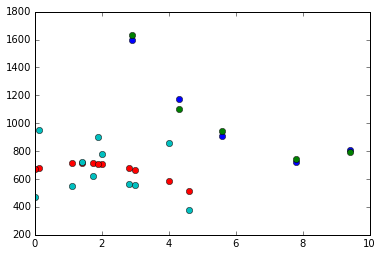

In [104]:
plt.plot(w_clust2, peval(w_clust2, plsq[0]),'o',w_clust2,dm_clust2,'o')#w_clust1,dm_clust1
plt.plot(w_clust1, peval(w_clust1, plsq1[0]),'o',w_clust1,dm_clust1,'o')#w_clust1,dm_clust1

In [105]:
mock_data = peval(np.linspace(2,10,100), plsq[0])
mock_data1 = peval(np.linspace(1,5,100), plsq1[0])

(200, 1800)

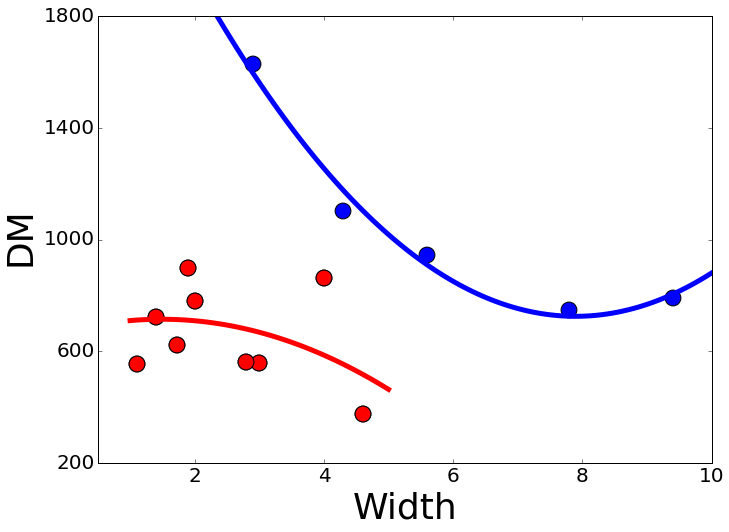

In [106]:
plt.figure(figsize=(11,8))
plt.scatter(W,DM,s=250, c='b',edgecolors='black' )
plt.scatter(w_clust1,dm_clust1,s=250, c='r',edgecolors='black')
plt.xlabel('Width',fontsize=36 )
plt.ylabel('DM', fontsize=36)## what about that 3.7??
#plt.xlim(0.5, 10)
plt.xticks(fontsize = 20)
plt.yticks(np.linspace(200, 1800, 5), fontsize = 20)

plt.plot(np.linspace(2,10,100),mock_data, 'b', lw = 5)
plt.plot(np.linspace(1,5,100),mock_data1, 'r', lw = 5)
plt.xlim(0.5, 10)
plt.ylim(200, 1800)
#plt.savefig('two_pop_fit.pdf')

In [107]:
mock_data = mock_data + 150*np.random.randn(len(mock_data))
mock_data1 = mock_data1 + 150*np.random.randn(len(mock_data))
#plt.plot(np.linspace(1,5,100),mock_data1, 'o')
mock_data = np.append(mock_data, DM)
mock_data = np.append(mock_data, mock_data1)

In [108]:
print len(mock_data)

216


In [109]:
mock_w = np.append(np.linspace(2,10,100), W)
mock_2 = np.append(mock_w,np.linspace(1,5,100))

In [110]:
X = np.array(zip(mock_2,mock_data))


In [111]:
y_mean = np.mean(mock_data)
x_mean = np.mean(mock_2)
y_diff = mock_data - y_mean
x_diff = mock_2 - x_mean
y_norm = y_diff/np.std(mock_data,ddof=1)
x_norm = x_diff/np.std(mock_2,ddof=1)
X_norm = np.array(zip(x_norm,y_norm))
#print X_norm

/Users/karaponder/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from IPython.kernel.zmq import kernelapp as app


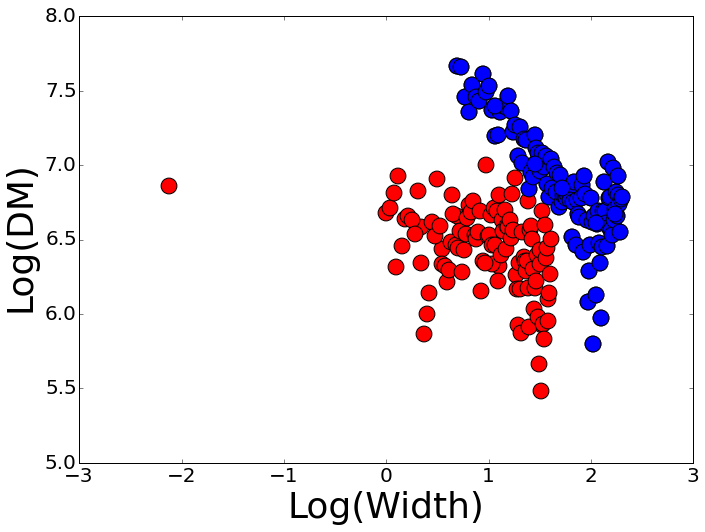

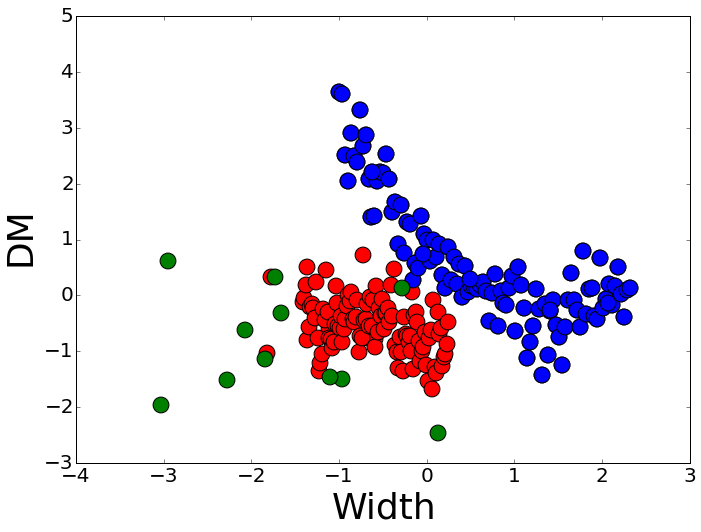

In [115]:
plt.figure(0, figsize=(11,8))
plt.scatter(np.log(mock_2),np.log(mock_data), s=250,c='r' )
plt.scatter(np.log(mock_2[0:101]),np.log(mock_data[0:101]), c='b',s=250)
plt.scatter(np.log(mock_2[102:104]),np.log(mock_data[102:104]), c='b', s=250)
plt.scatter(np.log(mock_2[107]),np.log(mock_data[107]), c='b', s=250)
plt.scatter(np.log(mock_2[105]),np.log(mock_data[105]), c='b', s=250)
plt.xlabel('Log(Width)',fontsize=36 )
plt.ylabel('Log(DM)', fontsize=36)## what about that 3.7??
#plt.xlim(0.5, 10)
plt.xticks(fontsize = 20)
plt.yticks( fontsize = 20)
plt.savefig('mock_data_log.pdf')

plt.figure(1, figsize=(11,8))
plt.scatter(x_norm,y_norm, c='r', s=250)
plt.scatter(x_norm[0:101],y_norm[0:101], c='b',s=250)
plt.scatter(x_norm[102:104],y_norm[102:104], c='b',s=250)
plt.scatter(x_norm[107],y_norm[107], c='b',s=250)
plt.scatter(x_norm[105],y_norm[105], c='b',s=250)
plt.xlabel('Width',fontsize=36 )
plt.ylabel('DM', fontsize=36)## what about that 3.7??
#plt.xlim(0.5, 10)
plt.xticks(fontsize = 20)
plt.yticks( fontsize = 20)
plt.scatter((w_clust1-x_mean)/np.std(w_clust1,ddof=1),(dm_clust1-y_mean)/np.std(dm_clust1,ddof=1),s=250, c='g',edgecolors='black')
#plt.savefig('mock_data.pdf')
#plt.plot(x_norm[103],y_norm[103], 'bo')

In [26]:
import numpy as np
import sklearn.cluster as cl
from sklearn import metrics

[[    4.61608158   666.50548309]
 [    3.26991123  1429.02687553]] 

8557426.6288


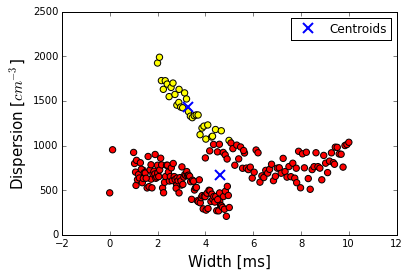

In [64]:
est = cl.KMeans(2, init='random',n_init=10 )
est.fit(X)
centers = est.cluster_centers_
inertia = est.inertia_
print centers,'\n\n',inertia
y_kmeans = est.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans,cmap='autumn_r', s=40);
plt.plot(centers[:,0],centers[:,1],'bx',ms=10,mew=2,label='Centroids');
plt.xlabel('Width [ms]',fontsize=15)
plt.ylabel(r'Dispersion [$cm^{-3}$]',fontsize=15)
plt.legend(numpoints=1);

[[ 0.65043343  0.63679536]
 [-0.6267813  -0.61363916]] 

257.536510161


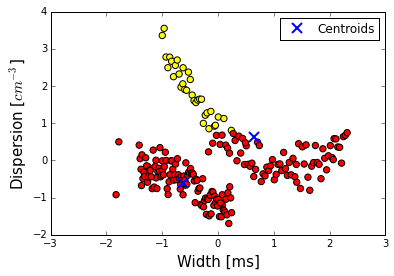

In [65]:
### NORMALIZED K_MEANS

st = cl.KMeans(2, init='random',n_init=10 )
est.fit(X_norm)
centers = est.cluster_centers_
inertia = est.inertia_
print centers,'\n\n',inertia
y_kmeans = est.fit_predict(X)
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=y_kmeans,cmap='autumn_r', s=40);
plt.plot(centers[:,0],centers[:,1],'bx',ms=10,mew=2,label='Centroids');
plt.xlabel('Width [ms]',fontsize=15)
plt.ylabel(r'Dispersion [$cm^{-3}$]',fontsize=15)
plt.legend(numpoints=1);

/Users/karaponder/anaconda/lib/python2.7/site-packages/sklearn/cluster/hierarchical.py:938: DeprecationWarning: The Ward class is deprecated since 0.14 and will be removed in 0.17. Use the AgglomerativeClustering instead.
  "instead.", DeprecationWarning)


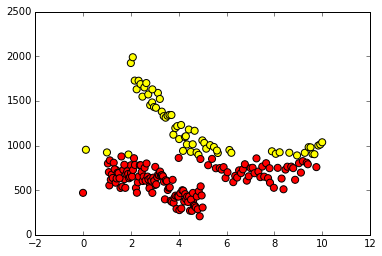

In [66]:
est_HC = cl.Ward(n_clusters = 2)
est_HC.fit(X)
y_HC = est_HC.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_HC, s=50,cmap='autumn_r')

/Users/karaponder/anaconda/lib/python2.7/site-packages/sklearn/cluster/hierarchical.py:938: DeprecationWarning: The Ward class is deprecated since 0.14 and will be removed in 0.17. Use the AgglomerativeClustering instead.
  "instead.", DeprecationWarning)


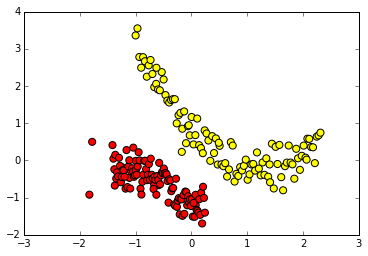

In [67]:
### NORMALIZED HIERARCHICAL

est_HC = cl.Ward(n_clusters = 2)
est_HC.fit(X_norm)
y_HC = est_HC.fit_predict(X_norm)
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=y_HC, s=50,cmap='autumn_r')

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  0 -1  0 -1  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0] 
# Clusters =  1


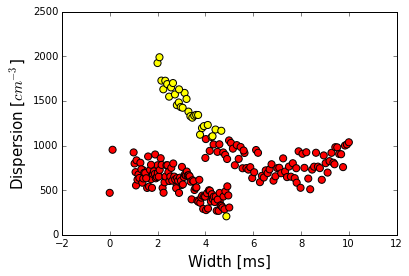

In [68]:
est_DB = cl.DBSCAN(eps=150,min_samples=50)
est_DB.fit(X)
y_DB = est_DB.fit_predict(X)

#Clusters
labels= est_DB.labels_
n_clusters = len(set(labels))-(1 if -1 in labels else 0)   #-1 indicate outliers/noise
print labels,'\n','# Clusters = ',n_clusters

#Silhouette Coefficient (1 => good, -1 => bad, 0 => overlapping clusters)
#print 'Silhouette Coefficient: ',metrics.silhouette_score(X,labels)

plt.scatter(X[:, 0], X[:, 1], c=y_DB, cmap='autumn_r',s=50);
#plt.imshow(y_DB)
plt.xlabel('Width [ms]',fontsize=15);
plt.ylabel(r'Dispersion [$cm^{-3}$]',fontsize=15);

[-1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  1  0  0  1  0  1  0  1  1  1  1  1  1 -1  0  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1] 
# Clusters =  2


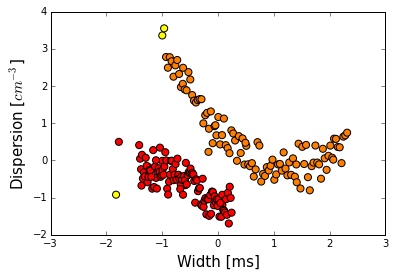

In [69]:
### NORMALIZE DBSCAN

est_DB = cl.DBSCAN()#eps=150,min_samples=50)
est_DB.fit(X_norm)
y_DB = est_DB.fit_predict(X_norm)

#Clusters
labels= est_DB.labels_
n_clusters = len(set(labels))-(1 if -1 in labels else 0)   #-1 indicate outliers/noise
print labels,'\n','# Clusters = ',n_clusters

#Silhouette Coefficient (1 => good, -1 => bad, 0 => overlapping clusters)
#print 'Silhouette Coefficient: ',metrics.silhouette_score(X,labels)

plt.scatter(X_norm[:, 0], X_norm[:, 1], c=y_DB, cmap='autumn_r',s=50);
#plt.imshow(y_DB)
plt.xlabel('Width [ms]',fontsize=15);
plt.ylabel(r'Dispersion [$cm^{-3}$]',fontsize=15);